# #GRIPAUGUST21
## sumbitted by :- Ayushi thakre
## Task 1

# Importing required libarires

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt


# Loading our model

In [2]:
configFile = r'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozenModel = r'frozen_inference_graph.pb'
model = cv.dnn_DetectionModel(frozenModel,configFile)


# Creating class File

In [3]:
classFile = r'coco.names'
classNames = []
with open(classFile, 'rt') as f:
    classNames = f.read().rstrip('\n').split('\n')
print(classNames, len(classNames)) #classNames ==> Contains all the 80 classes from the coco dataset


['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'] 80


# setting up configuration of model

In [4]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 0F07B750>

# capturing the video

In [5]:
cap = cv.VideoCapture(r'traffic-mini.mp4')
#cap = cv.VideoCapture(0) ==> webcam
if not cap.isOpened():
    raise IOError("Cannot Open Video")


In [6]:
#Setting the font scale and font style

font_scale = 1.1
font = cv.FONT_HERSHEY_COMPLEX

# Reading each frame and detecting the objects in it


In [7]:
# Reading each frame and detecting the objects in it

while True:
    ret,frame = cap.read()
    ClassIndex, confidence, bbox = model.detect(frame,confThreshold=0.62)
    if len(ClassIndex)!= 0:
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
            if ClassInd <= 80:
                cv.rectangle(frame,boxes,(255,0,0),2)
                cv.putText(frame,classNames[ClassInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale=font_scale, color = (0,255,0),thickness = 3)
    cv.imshow("output",frame)
    if cv.waitKey(2) & 0xFF == ord('q'):
        break  #breaks out of the loop as soon as we press 'q' from our keyboard
cap.release()
cv.destroyAllWindows()

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-xeqjxthj\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


# for an Image

-1

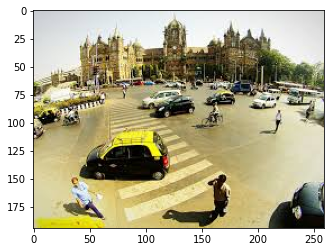

In [8]:
# # For an image


img = cv.imread(r'images.jpg')
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(rgb);


ClassIndex, confidence, bbox = model.detect(rgb,confThreshold=0.5)

font_scale = 1.1
font = cv.FONT_HERSHEY_COMPLEX
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv.rectangle(img,boxes,(255,0,0),2)
    cv.putText(img,classNames[ClassInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale=font_scale, color = (0,255,0),thickness = 3)
cv.imshow('output',img);
cv.waitKey(0)



In [ ]:

img = cv.imread(r'imagetask1.jpg')
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(rgb);


ClassIndex, confidence, bbox = model.detect(rgb,confThreshold=0.5)

font_scale = 1.1
font = cv.FONT_HERSHEY_COMPLEX
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv.rectangle(img,boxes,(255,0,0),2)
    cv.putText(img,classNames[ClassInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale=font_scale, color = (0,255,0),thickness = 3)
cv.imshow('output',img);
cv.waitKey(0)

